# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
from numpy.linalg import cholesky
%matplotlib inline

## 生成数据

In [2]:
def genData(M, N = 100):
    rnd.seed(0)
    Sigma = np.array([[1, 0], [0, 1]])
    R = cholesky(Sigma)
    
    mu = np.array([[-M, 0]])
    s1 = np.dot(np.random.randn(N, 2), R) + mu
    mu = np.array([[M, 0]])
    s2 = np.dot(np.random.randn(N, 2), R) + mu
    
    one = np.ones(s1.shape[0]).reshape(100,1)
    
    s1 = np.concatenate((s1, -1 * one), axis = 1)
    s2 = np.concatenate((s2,  1 * one), axis = 1)
    s_t = np.concatenate((s1, s2), axis=0)
    s = np.concatenate((np.ones((s_t.shape[0],1)), s_t), axis=1)
    
    return s

## 绘制图像

In [3]:
def genPlt(S, w, plt):
    y = np.linspace(-3,3)
    x = (w[0] + w[2] * y)/w[1]

    plt.plot(S[:101,1],S[:101,2],'+')
    plt.plot(S[101:,1],S[101:,2],'o')
    plt.plot(x,y)
    
    return plt

## 最小方差准则（误差平方和）分类器

In [4]:
def SSErr(S):
    X = S[:,:-1]
    y = S[:,-1]
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

## Widrow-Hoff算法（LMS算法）

In [5]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

def LMSalg(S,theta):
    m = S.shape[0]
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = S[random_index:random_index+1, :-1]
            yi = S[random_index:random_index+1, -1]
            gradients = 2 * xi.T.dot(np.dot(xi, theta) - yi)
            eta = learning_schedule(epoch * m + i)
            theta = theta - eta * gradients    
    return theta

## 通过MSE分类器求解数值解

In [15]:
S = genData(5)

[0.01397086 0.19511246 0.00541437]


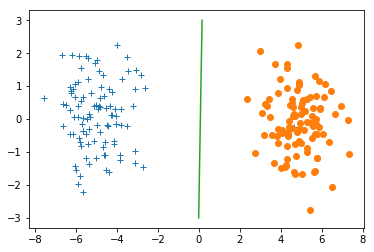

In [7]:
theta_best = SSErr(S)
plt = genPlt(S, theta_best, plt)
print(theta_best)
plt.show()

## 通过LMS算法对不同的数据集进行分类

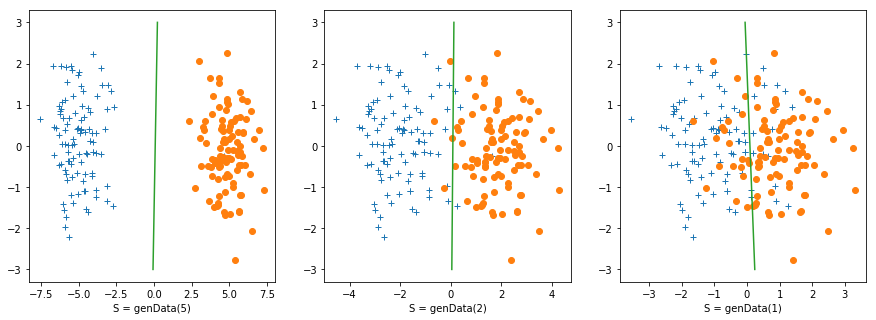

In [26]:
plt.figure(1, figsize=(15, 5))

S = genData(5)
np.random.seed(42)
theta = np.random.randn(S.shape[1]-1,1)
theta = LMSalg(S, theta)
plt.subplot(131)
plt = genPlt(S, theta, plt)
plt.xlabel('S = genData(5)')

S = genData(2)
np.random.seed(42)
theta = np.random.randn(S.shape[1]-1,1)
theta = LMSalg(S, theta)
plt.subplot(132)
plt = genPlt(S, theta, plt)
plt.xlabel('S = genData(2)')

S = genData(1)
np.random.seed(42)
theta = np.random.randn(S.shape[1]-1,1)
theta = LMSalg(S, theta)
plt.subplot(133)
plt = genPlt(S, theta, plt)
plt.xlabel('S = genData(1)')

plt.show()

# 总结

通过对于不同数据集的分类发现,LMS算法能够较好的对线性可分数据集进项硬分类,同时也能较好的对线性不可分数据集进行软分类,综合来看LMS是基本能够基本应对所有线性数据集的二元分类器.